In [1]:
from clawpack.pyclaw.gauges import GaugeSolution
import numpy
import matplotlib.pyplot as plt 
import os 

%matplotlib inline 

## Code to gather and plot data  

In [7]:
geo_dir = 'gulf'
models = ['CLE', 'H80', 'H10', 'SLOSH']
#models = ['H80']

title_font = {'fontname':'Arial', 'size':'32', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'26'}

def seconds2days(seconds):
    r"""
    Convert seconds to days. 
    """
    days = seconds/(3600*24)
    return days 
    


def gather_file_paths(storm): 
    r"""
    Gather the paths needed to gather data.     
    """
    paths = [] 
    for w in models: 
        storm_run = '%s-%s' %(storm,w)
        file_path = os.path.join(os.getcwd(),geo_dir,storm,storm_run,'_output')
        paths.append(file_path)

    return paths 

def gather_data(storm): 
    r"""
    Get data from file paths.
    """
    gauges = {} 
    paths = gather_file_paths(storm)
    for i in range(0,len(models)): 
        gauges[models[i]] = [] 
        for x in range(0,len(models)): 
            gauges[models[i]].append(GaugeSolution(gauge_id=x+1, path = paths[i]))
    return gauges 
                                
                                
def plot_data(storm):
    r"""
    Plot the data for the specified storm. 
    """
    gauges = gather_data(storm)
    storm = storm.upper()
    
    for x in range(0,len(models)): 
        fig = plt.figure()
        fig.set_size_inches(18.5, 10.5)
        axes = fig.add_subplot(1, 1, 1)
        for w in models: 
            line_label = "%s" %w
            days = seconds2days(gauges[w][x].t)
            days = days - days[0]
            axes.plot(days, gauges[w][x].q[3],'--',label=line_label)
        #axes.plot(days, numpy.zeros(gauges[w][x].q[3].shape[0]), '-k', label="MSL")
            
        axes.set_title("%s Gauge %i" %(storm,x+1),**title_font)
        axes.set_xlabel("Days from First Tracking",**axis_font)
        axes.set_ylabel("Height from MSL (m)",**axis_font)
        
        figure_title = "%s_Gauge_%i.png" %(storm,x+1)
        fig.savefig('./gauges/%s'%(figure_title),format='png')
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlim(days[0],days[-1])
        plt.legend(prop={'size': 28})
        plt.show()

# Ike 2008 Gauges 

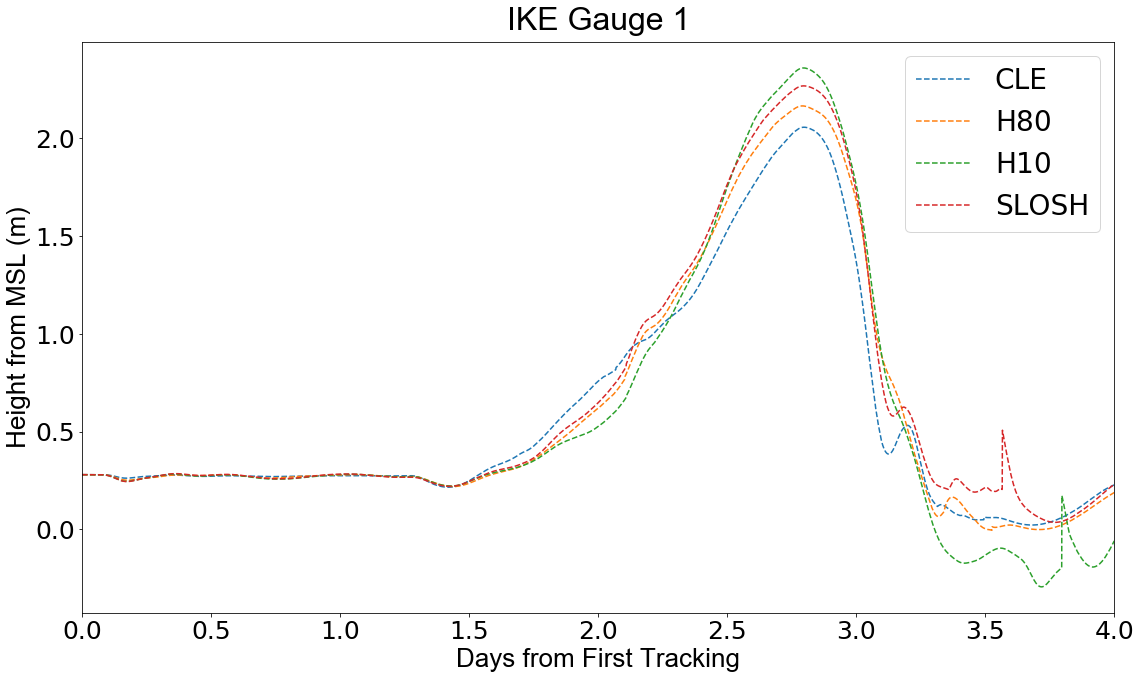

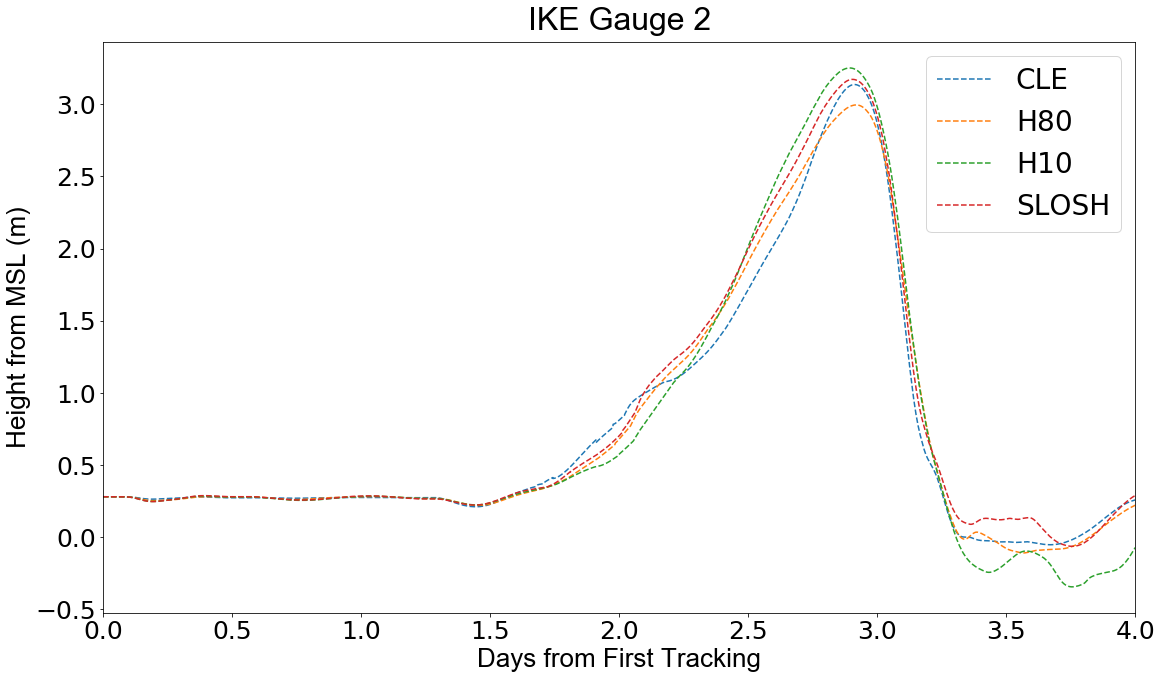

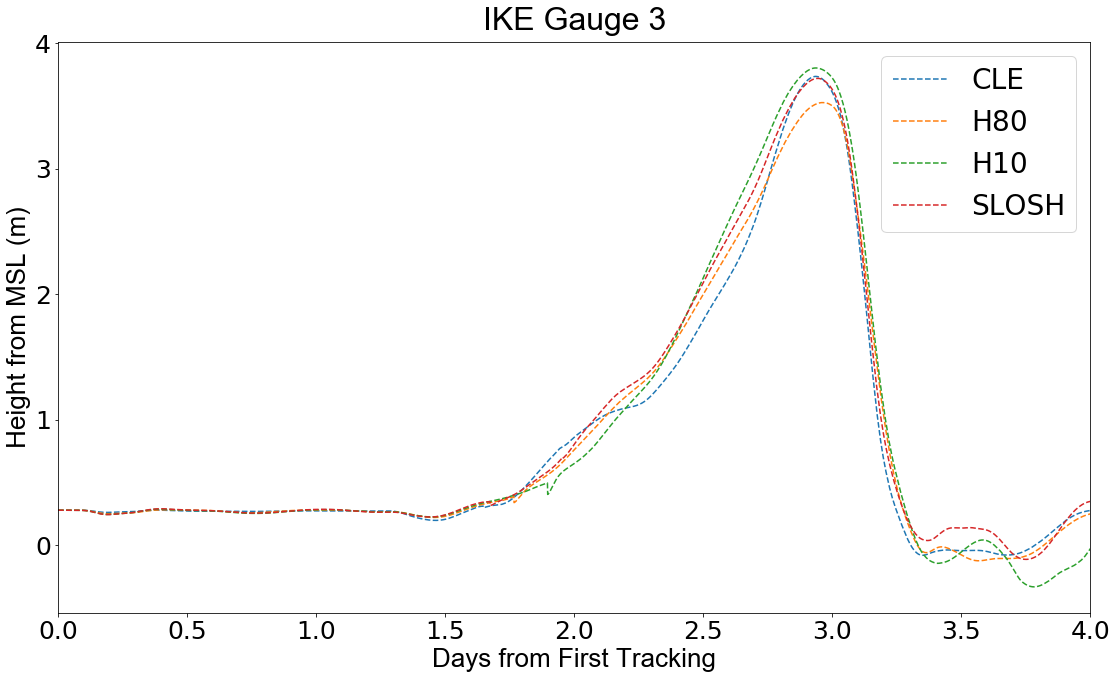

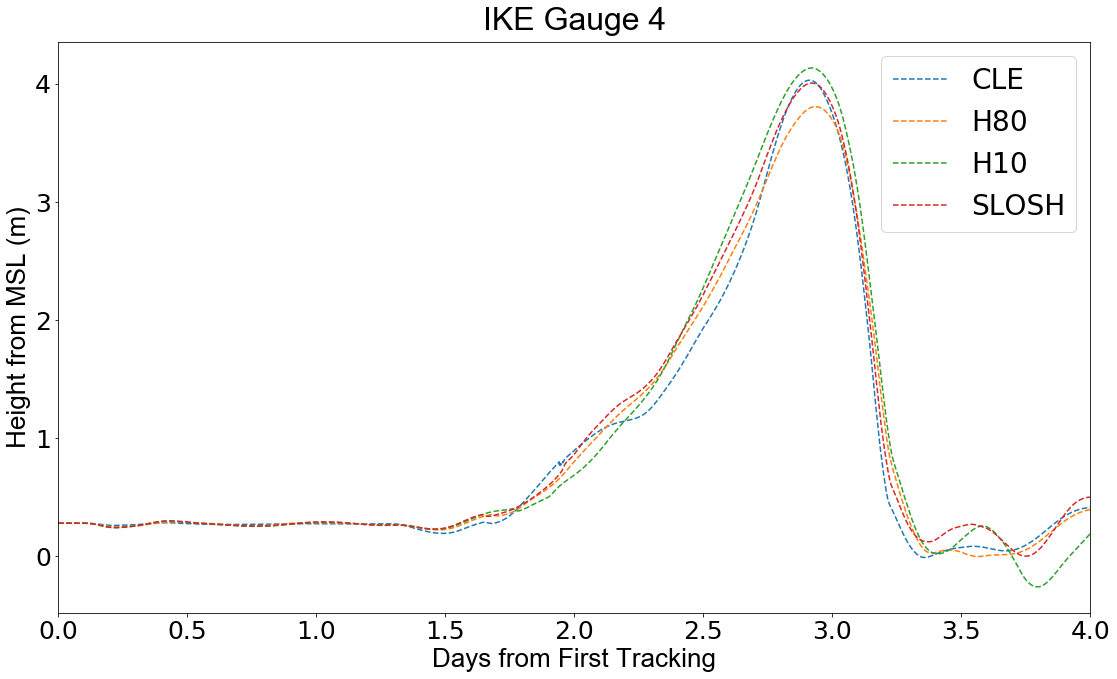

In [8]:
plot_data('ike')

# Isaac 2012 Gauges 

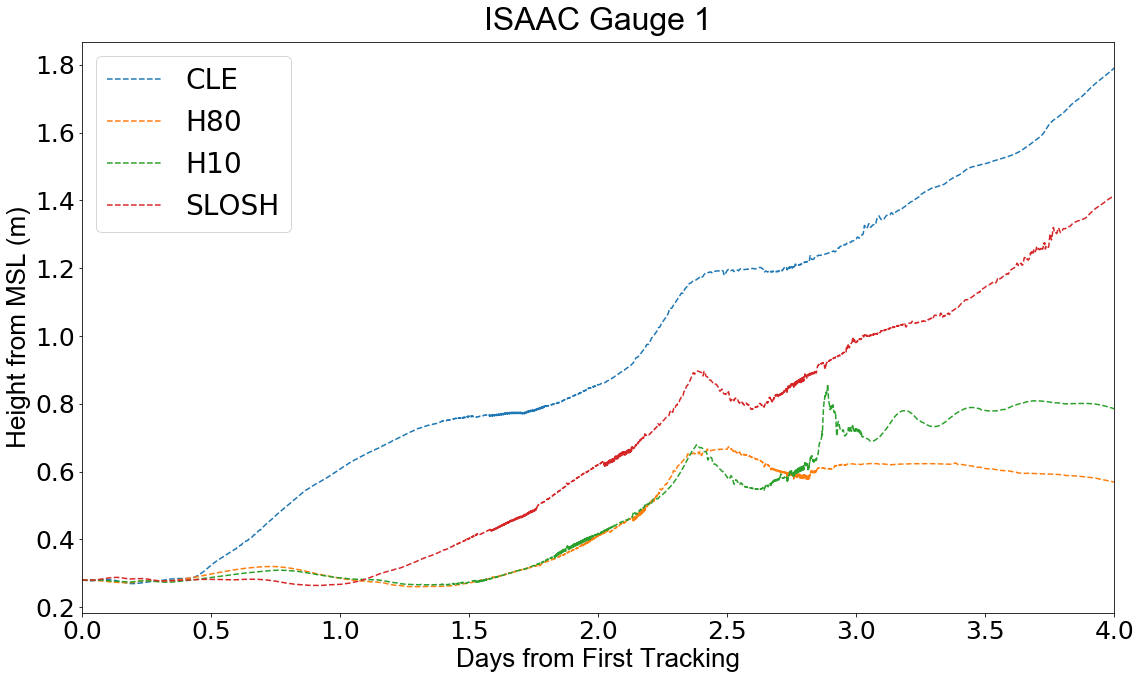

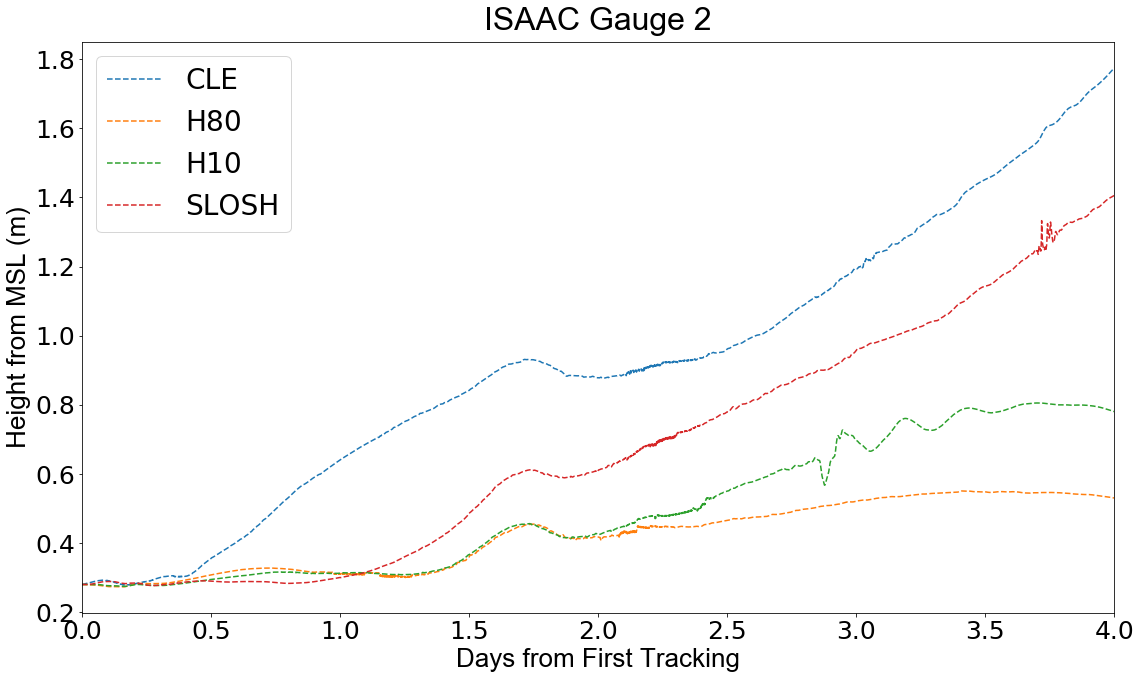

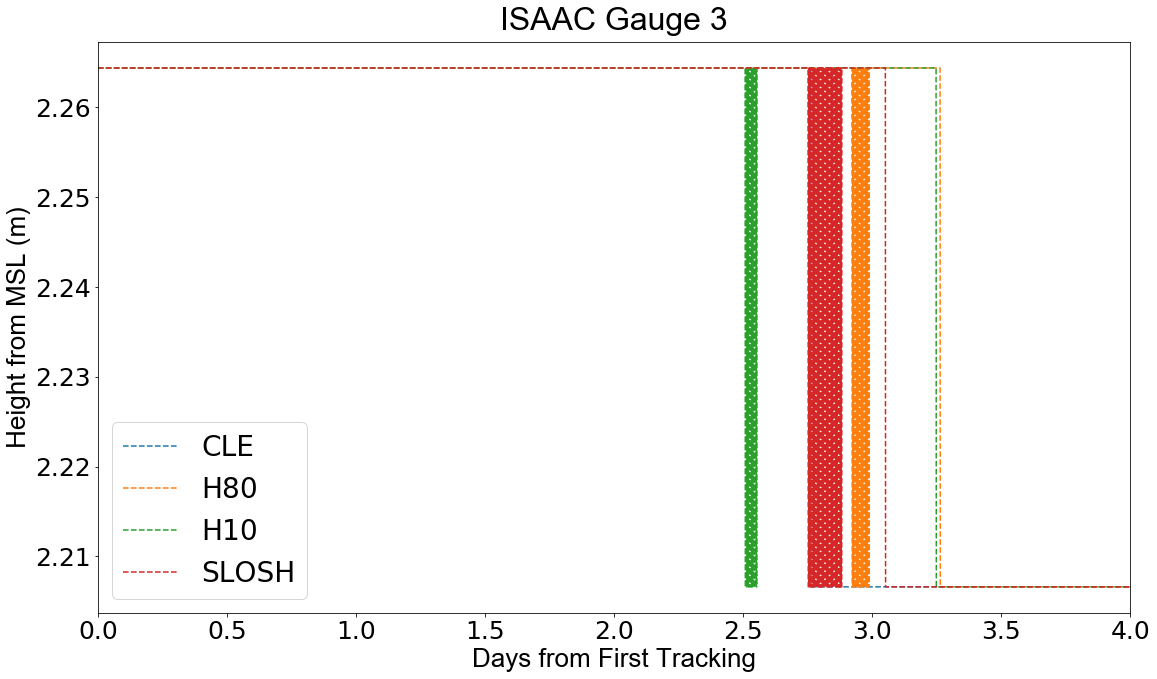

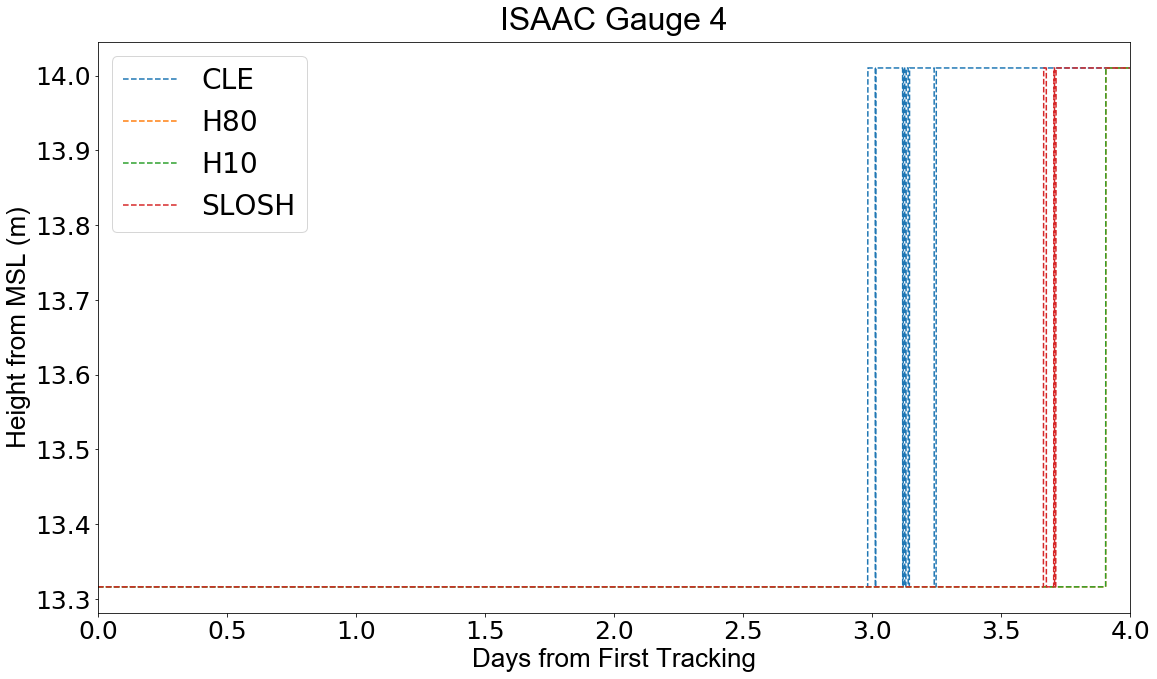

In [9]:
plot_data('isaac')

# Earl 2016 Gauges

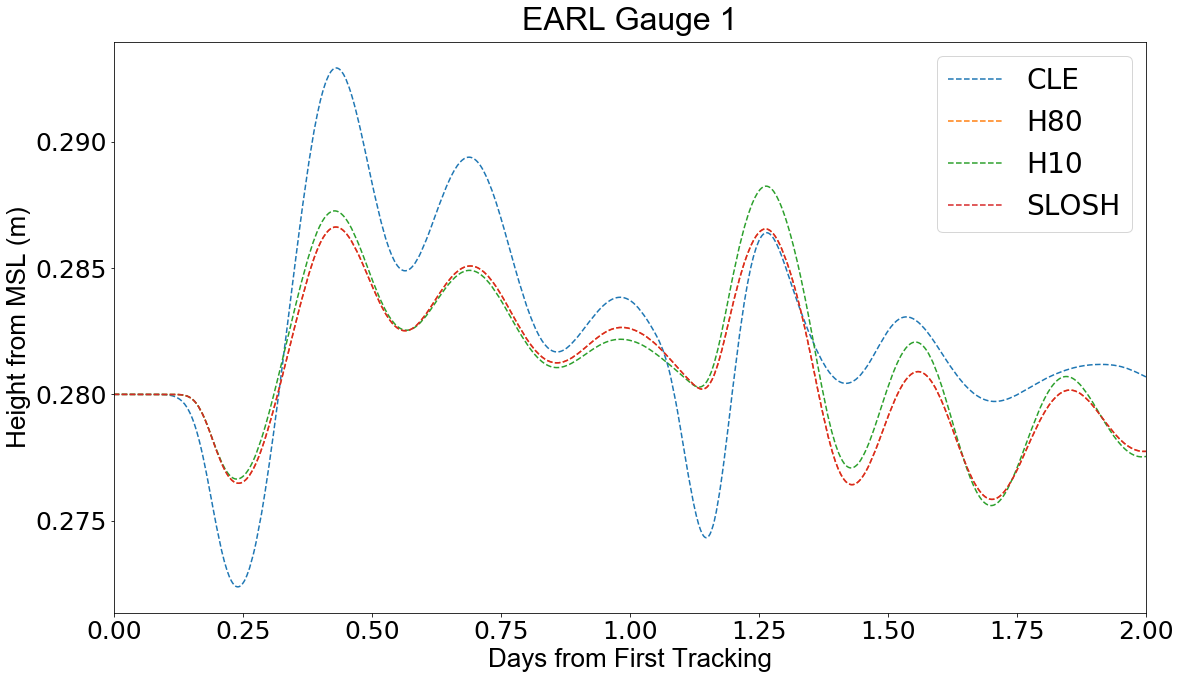

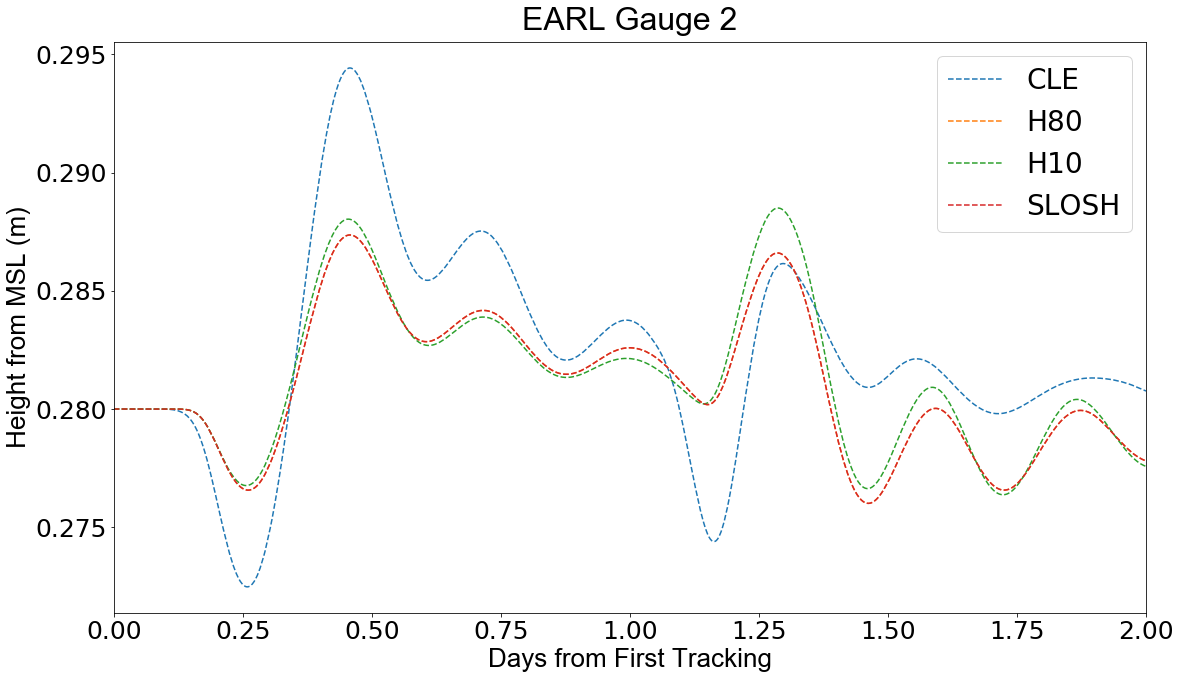

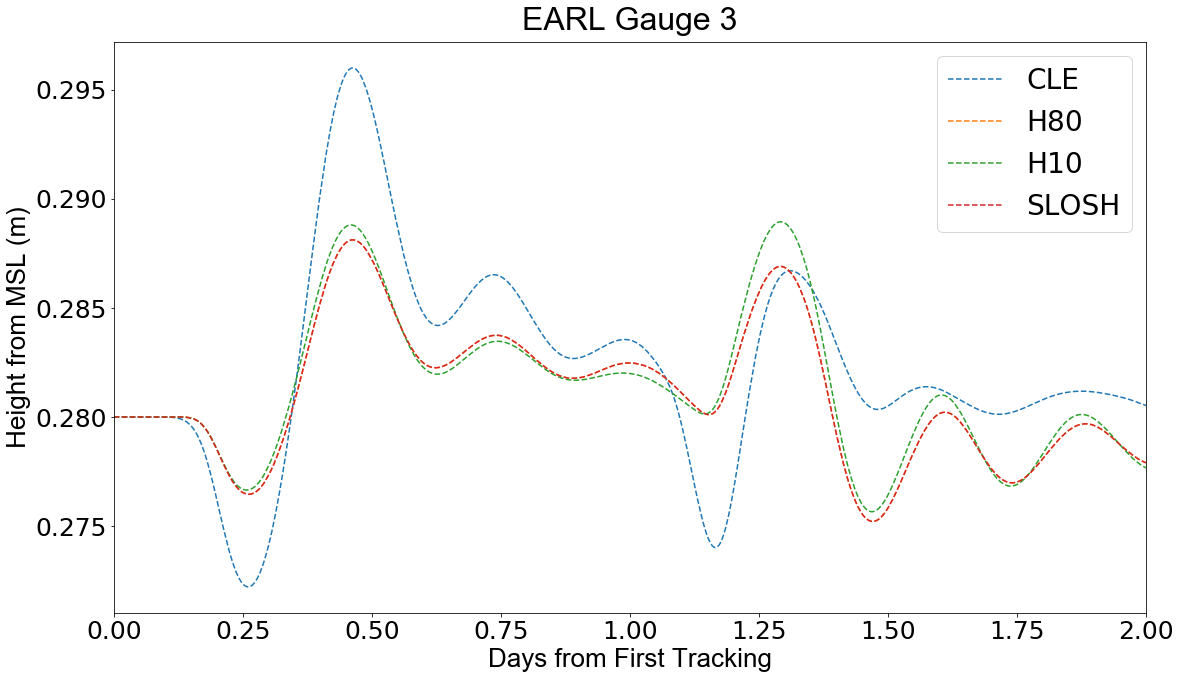

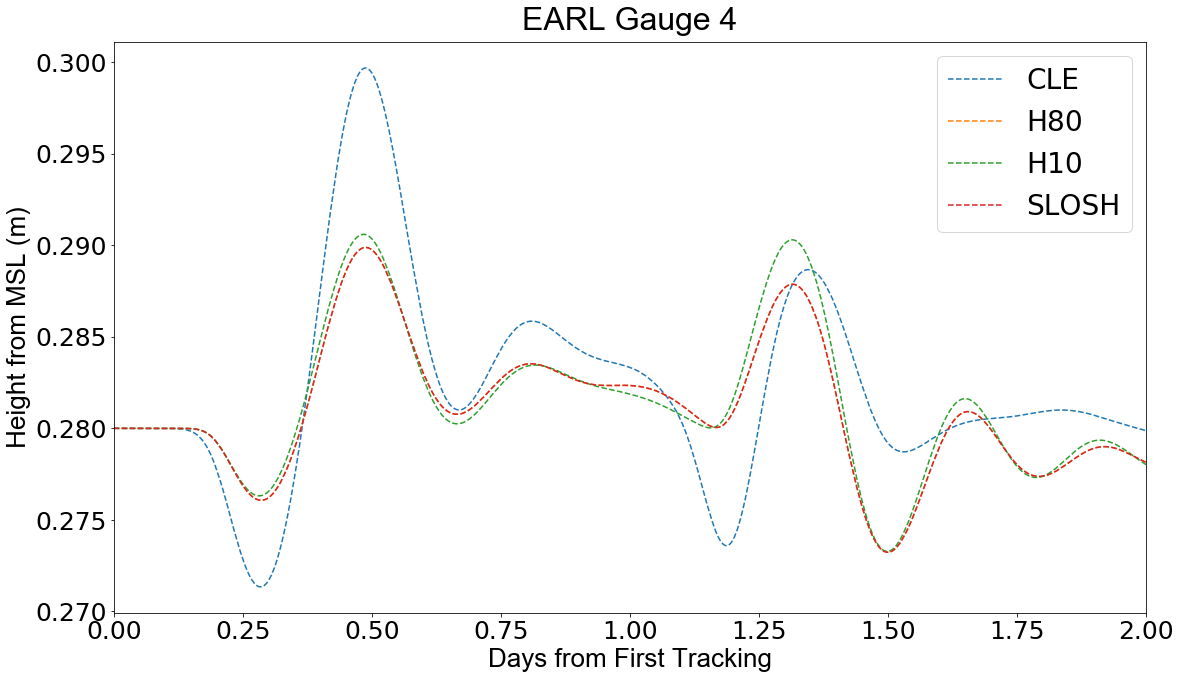

In [10]:
plot_data('earl')

# Katrina 2005 Gauges

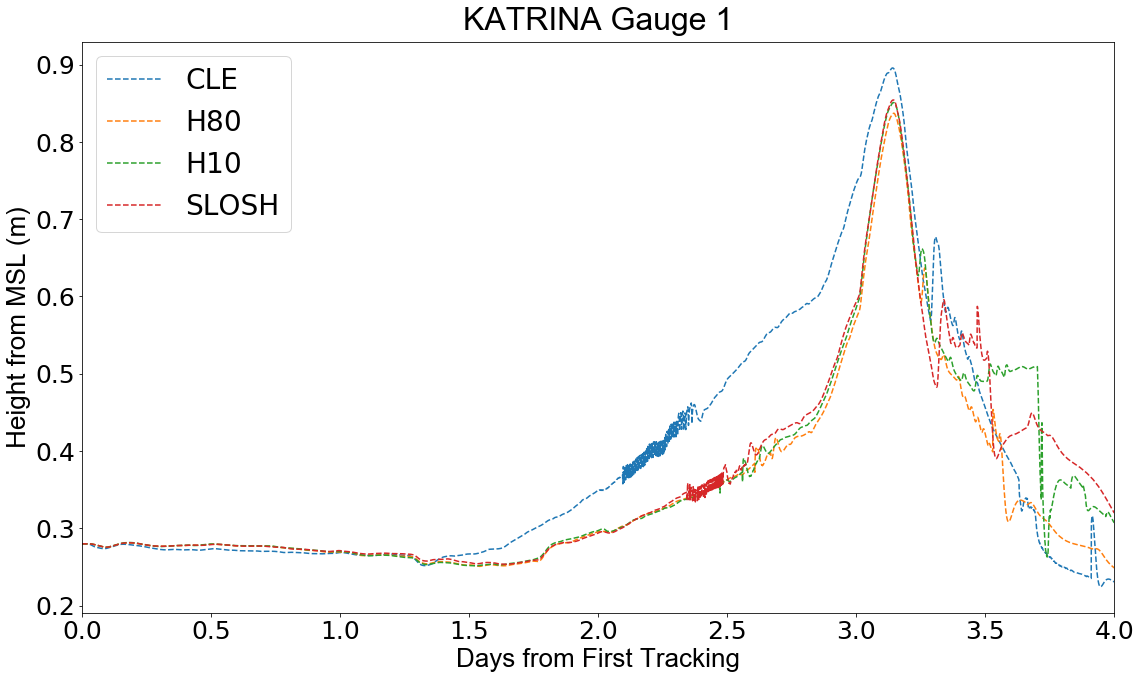

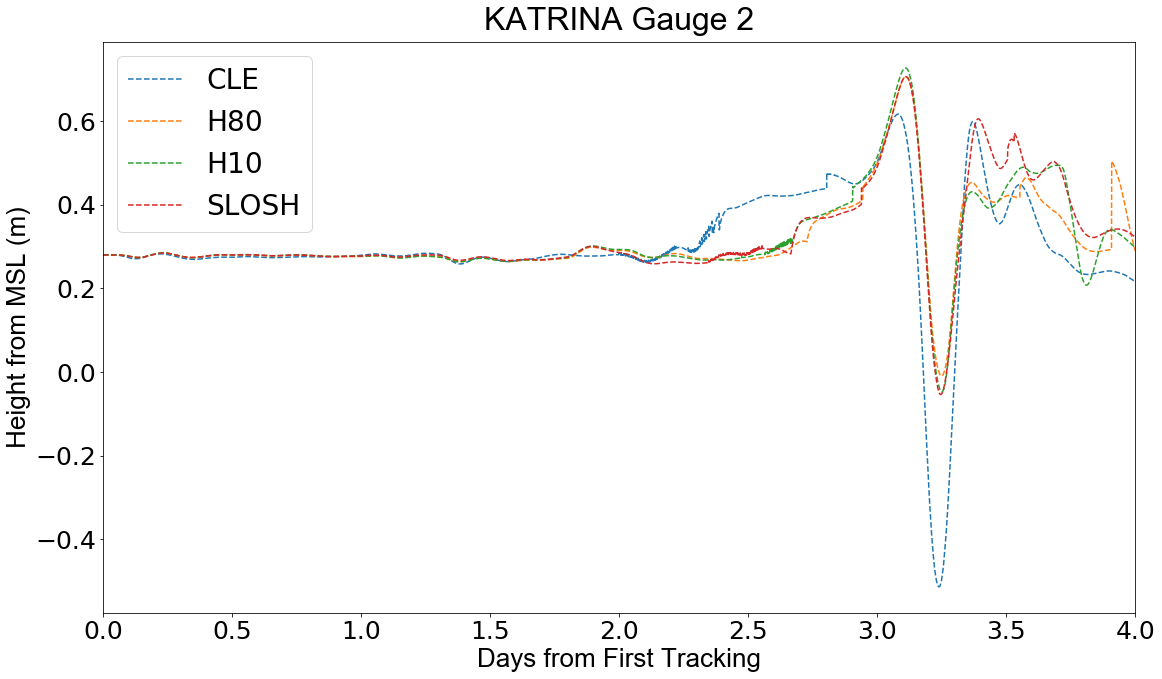

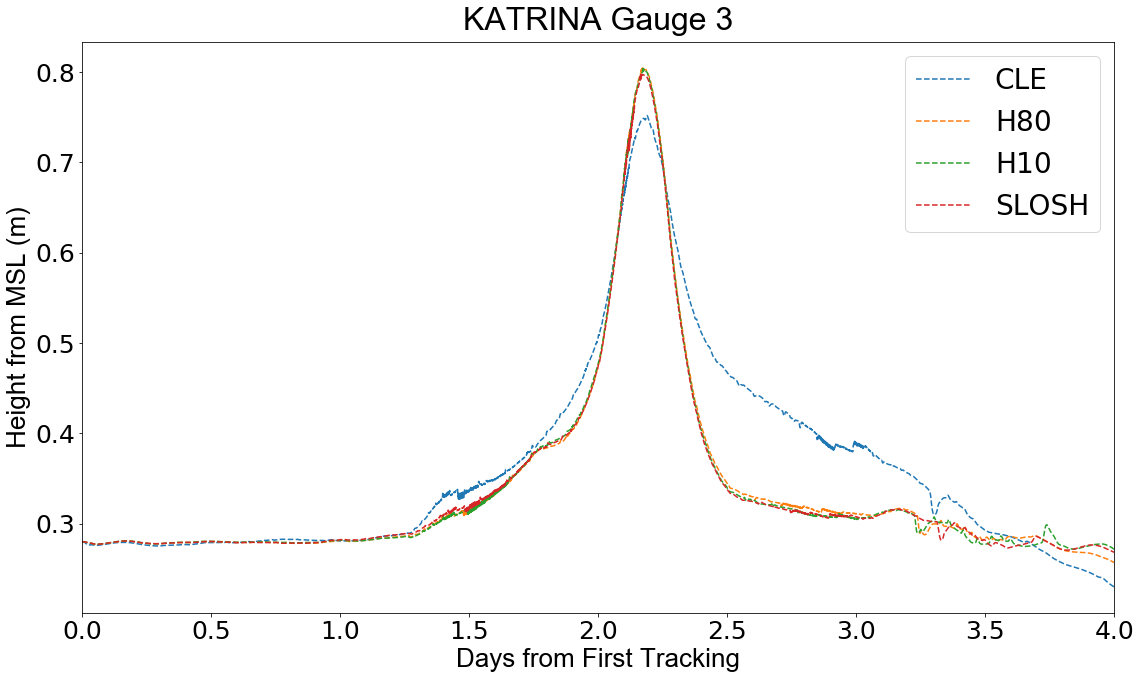

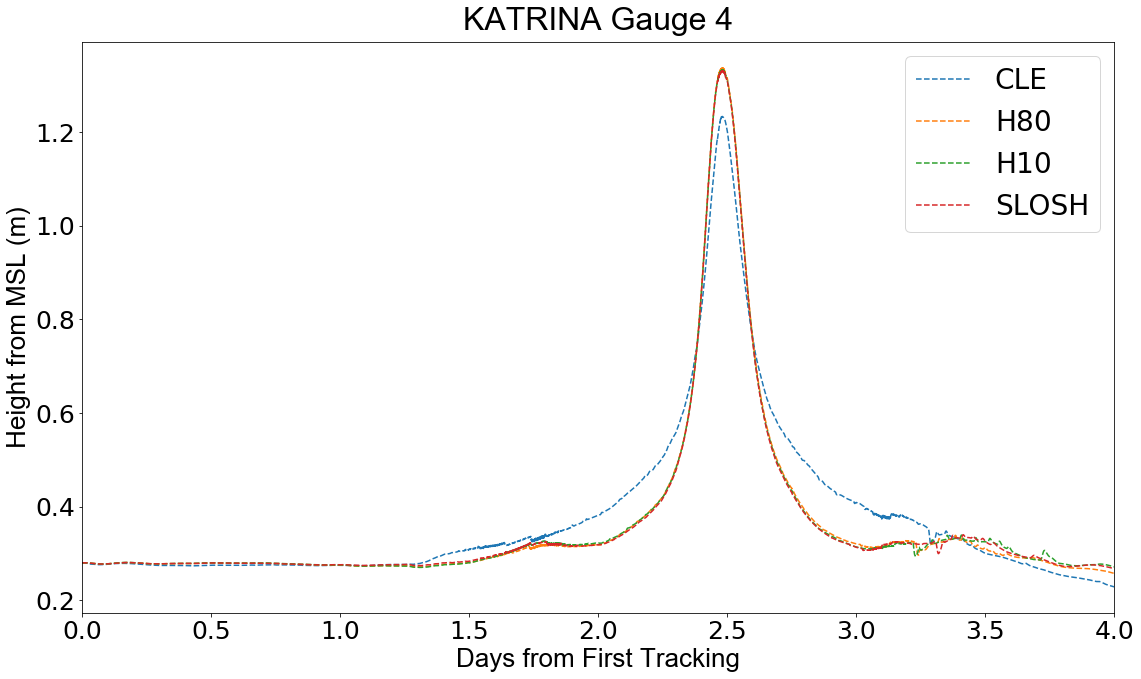

In [11]:
plot_data('katrina')